# Task 2

In [133]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(42)
np.random.seed(42)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# Basic Checks

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
df.describe(include ='O')

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


In [7]:
df.shape

(50000, 14)

# Adding New Columns

In [8]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [9]:
df.flight_day.value_counts()

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

# 1. Is Weekened 

In [10]:
# Assuming 'flight_day' column contains days of the week (e.g., 'Monday', 'Tuesday', etc.)
# You can check if the day is a weekend (Saturday or Sunday)
df['is_weekend'] = df['flight_day'].apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)

# 2. Booking Time Pattern

In [11]:
# Assuming 'flight_hour' is in 24-hour format (0-23), categorize the time of day
def booking_time_pattern(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['booking_time_pattern'] = df['flight_hour'].apply(booking_time_pattern)

# 3. Total Extra Service Requested

In [12]:
# Summing up the columns for extra services requested
df['total_extra_services'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']

# 4. Popular Flight Route

In [13]:
# Counting how many times each route occurs
route_counts = df['route'].value_counts()
popular_routes = route_counts[route_counts > route_counts.quantile(0.75)]  # Define "popular" as top 25% frequent routes

# Create a new column to mark popular routes
df['is_popular_route'] = df['route'].apply(lambda x: 1 if x in popular_routes.index else 0)

# 5. Passenger Count

In [14]:
# Categorizing passengers into groups (Solo, Family, Group)
def passenger_group(num_passengers):
    if num_passengers == 1:
        return 'Solo'
    elif 2 <= num_passengers <= 4:
        return 'Family'
    else:
        return 'Group'

df['passenger_group'] = df['num_passengers'].apply(passenger_group)

In [15]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_time_pattern,total_extra_services,is_popular_route,passenger_group
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,1,Morning,1,0,Family
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,1,Night,0,0,Solo
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0,Afternoon,2,0,Family
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1,Night,1,0,Solo
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0,Afternoon,2,0,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,1,Morning,2,1,Family
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,1,Night,0,1,Solo
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,1,Evening,1,1,Solo
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,0,Morning,2,1,Solo


In [16]:
num_cols = df.select_dtypes(include=['float64','int64']).columns             #numerical columns
num_cols

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'is_weekend',
       'total_extra_services', 'is_popular_route'],
      dtype='object')

In [17]:
num_cols.shape

(12,)

# Discrete Columns : 8

In [18]:
discrete_cols = [col for col in num_cols if df[col].nunique()<10]
discrete_cols#ordinal

['num_passengers',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'booking_complete',
 'is_weekend',
 'total_extra_services',
 'is_popular_route']

In [19]:
len(discrete_cols)

8

# Continous Columns : 4

In [20]:
continous_cols = [col for col in num_cols if col not in discrete_cols]   #continous
continous_cols

['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

In [21]:
len(continous_cols)

4

# Categorical Columns : 7

In [22]:
cat_cols = df.select_dtypes(include=['object']).columns        #categorical columns
cat_cols

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin',
       'booking_time_pattern', 'passenger_group'],
      dtype='object')

In [23]:
cat_cols.shape

(7,)

In [24]:
8+4+7

19

# EDA

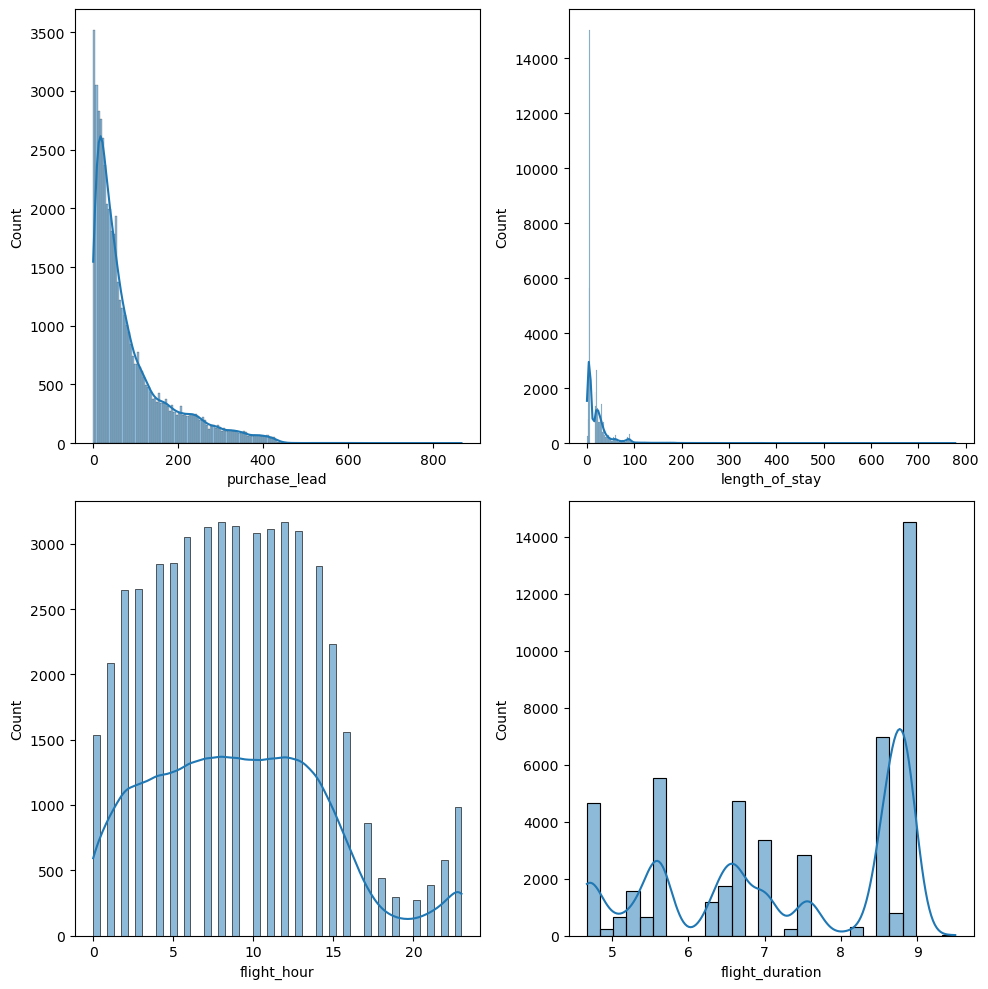

In [25]:
#applying hist plot for continous columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in continous_cols:
    plt.subplot(2,2,plotnumber)
    sns.histplot(x = df[i],kde = True)
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

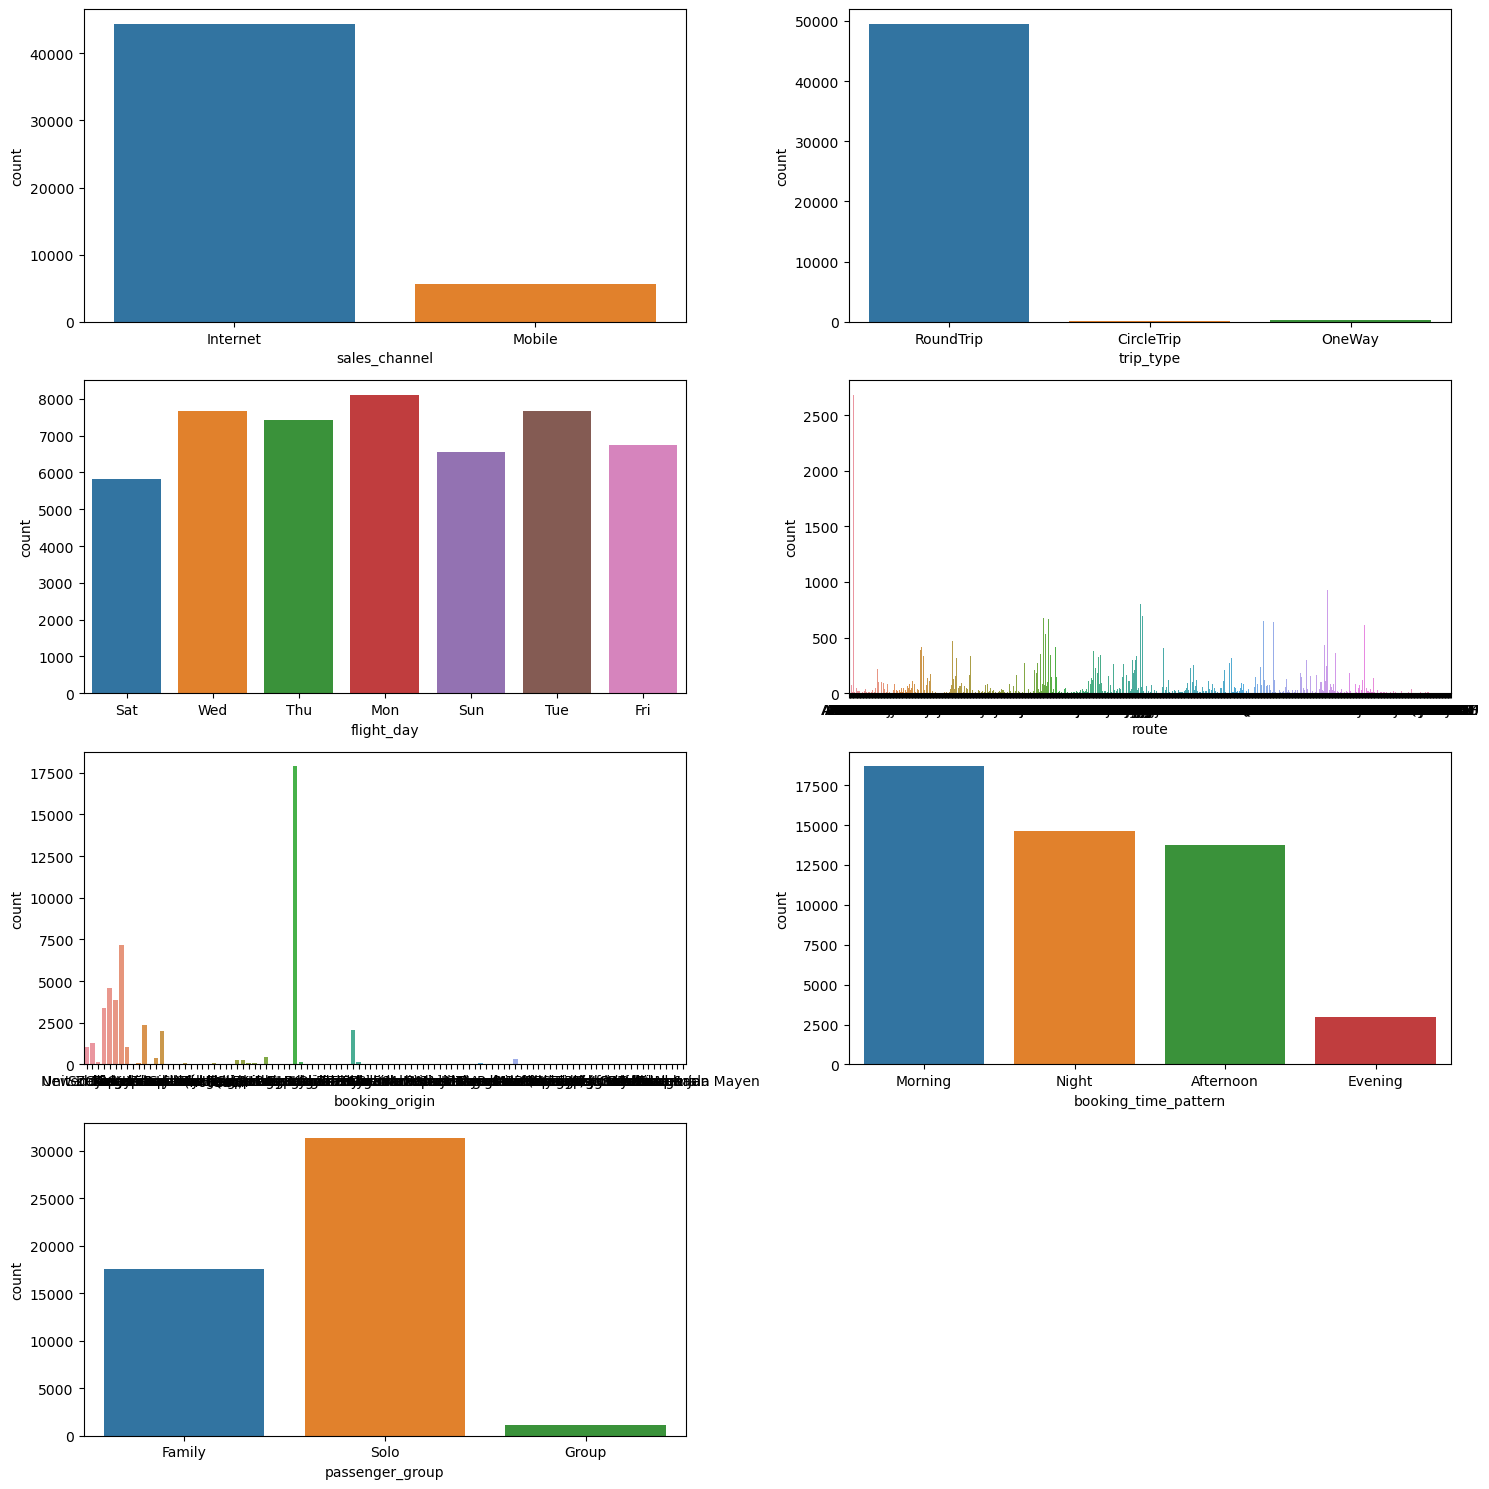

In [26]:
#applying count plot for categorical columns
plt.figure(figsize=(15,15))
plotnumber = 1
for i in cat_cols:
    plt.subplot(4,2,plotnumber)
    sns.countplot(x = df[i])
    plotnumber = plotnumber + 1
plt.tight_layout()

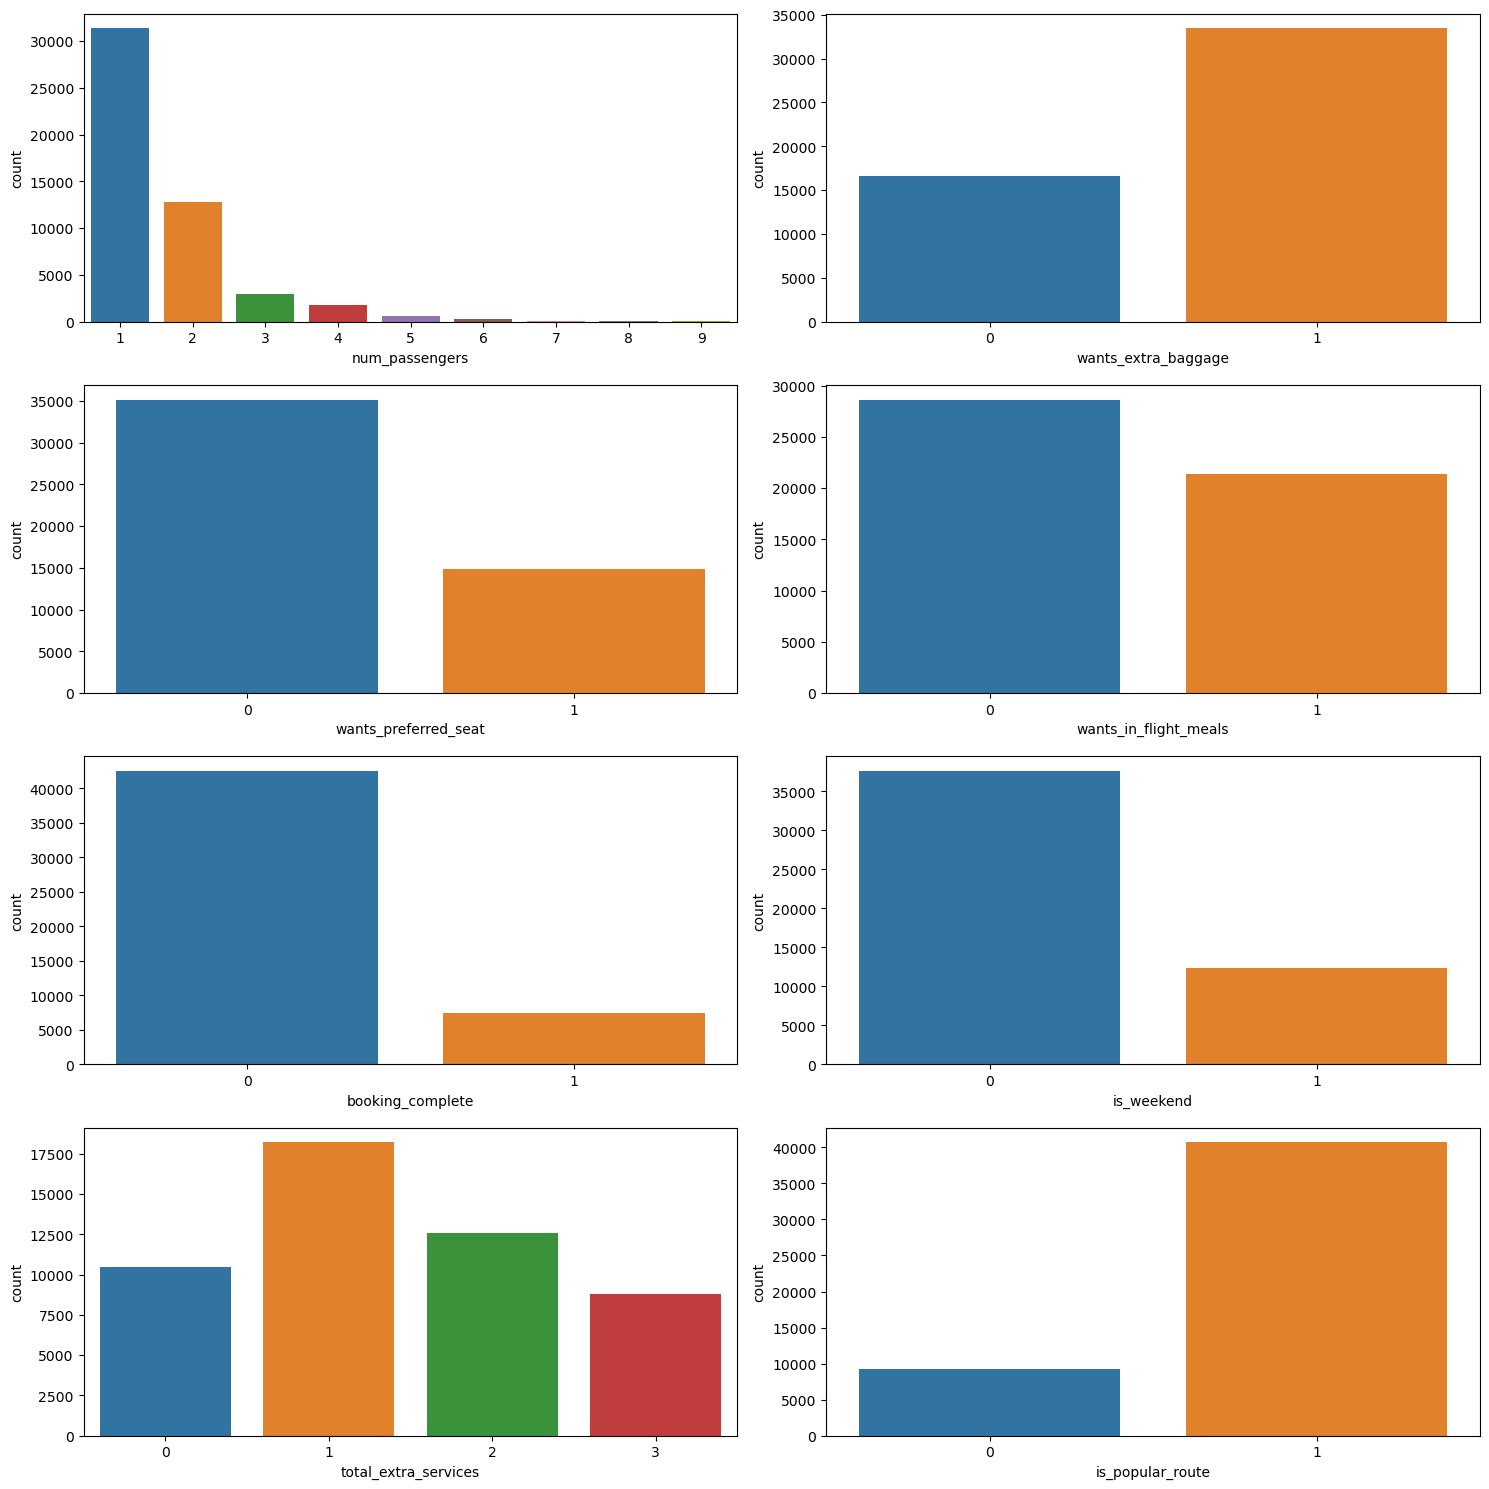

In [27]:
#applying countplot for discrete columns
plt.figure(figsize=(15,15))
plotnumber = 1
for i in discrete_cols:
    plt.subplot(4,2,plotnumber)
    sns.countplot(x = df[i])
    plotnumber = plotnumber + 1
plt.tight_layout()

# Bivariate Analysis

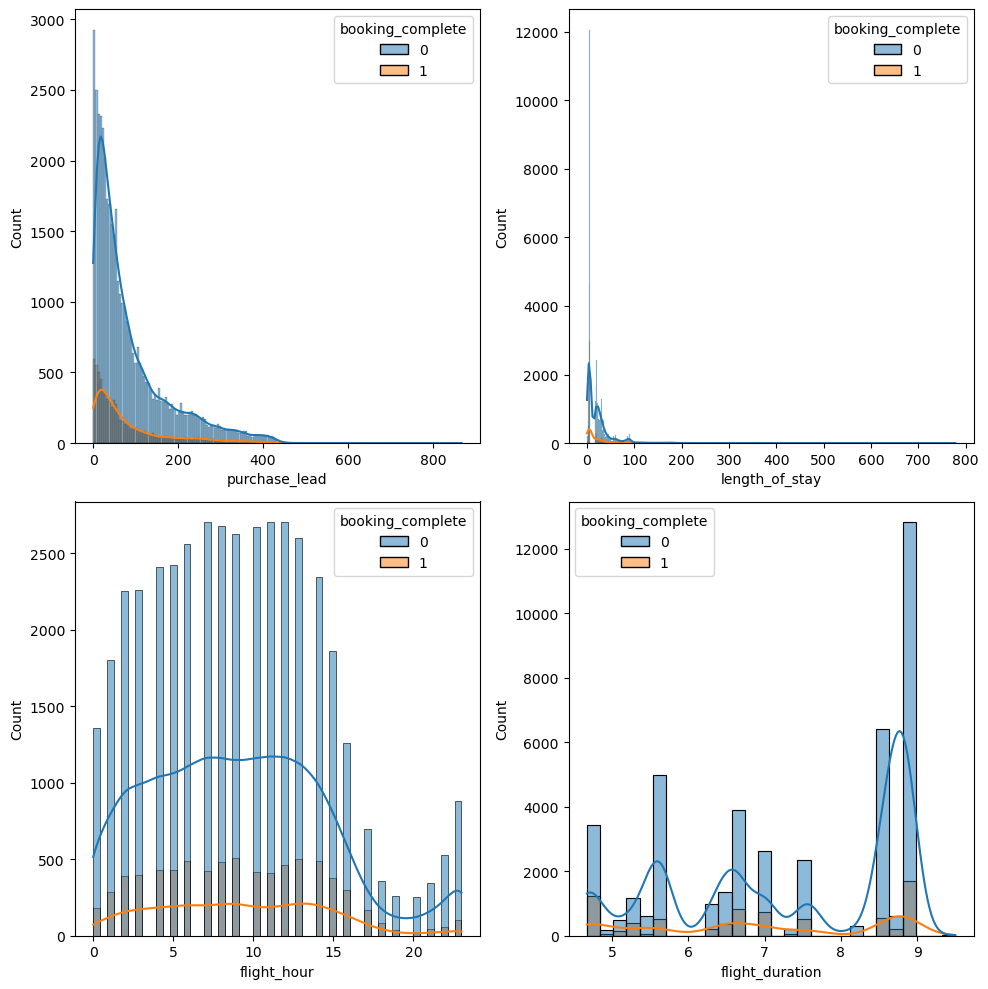

In [28]:
# continous columns vs target variable

plt.figure(figsize=(10,10))
plotnumber = 1
for i in continous_cols:
    plt.subplot(2,2,plotnumber)
    sns.histplot(data = df, x = i,hue = 'booking_complete',kde = True)
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

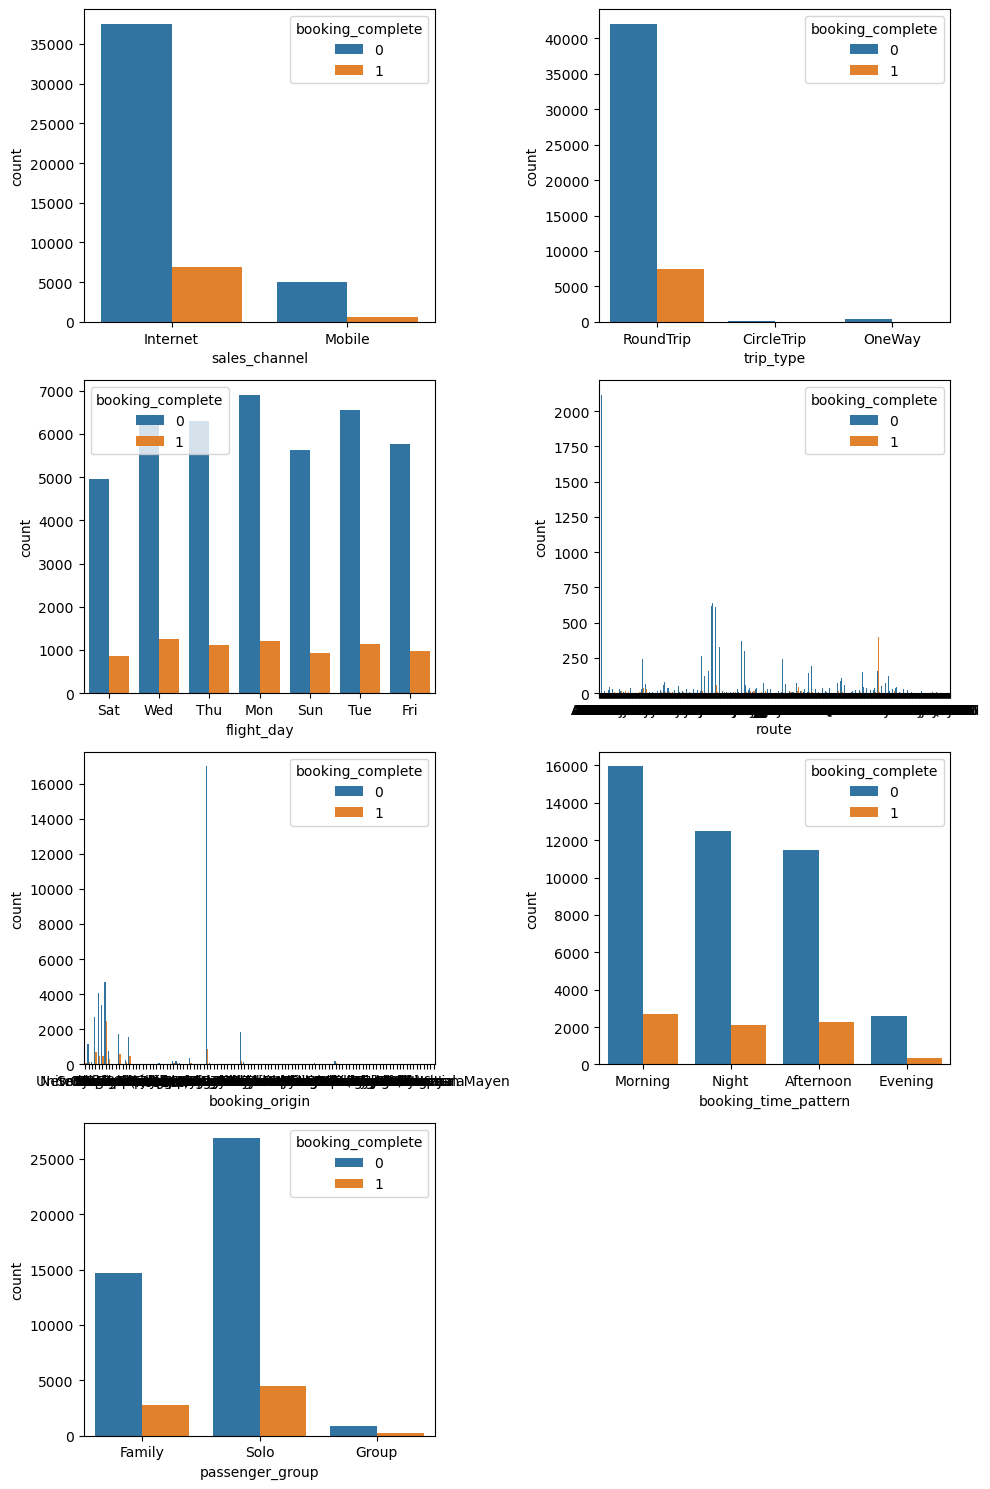

In [29]:
#categorical columns vs target variable
plt.figure(figsize=(10,15))
plotnumber = 1
for i in cat_cols:
    plt.subplot(4,2,plotnumber)
    sns.countplot(data  = df,x = i, hue = 'booking_complete')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

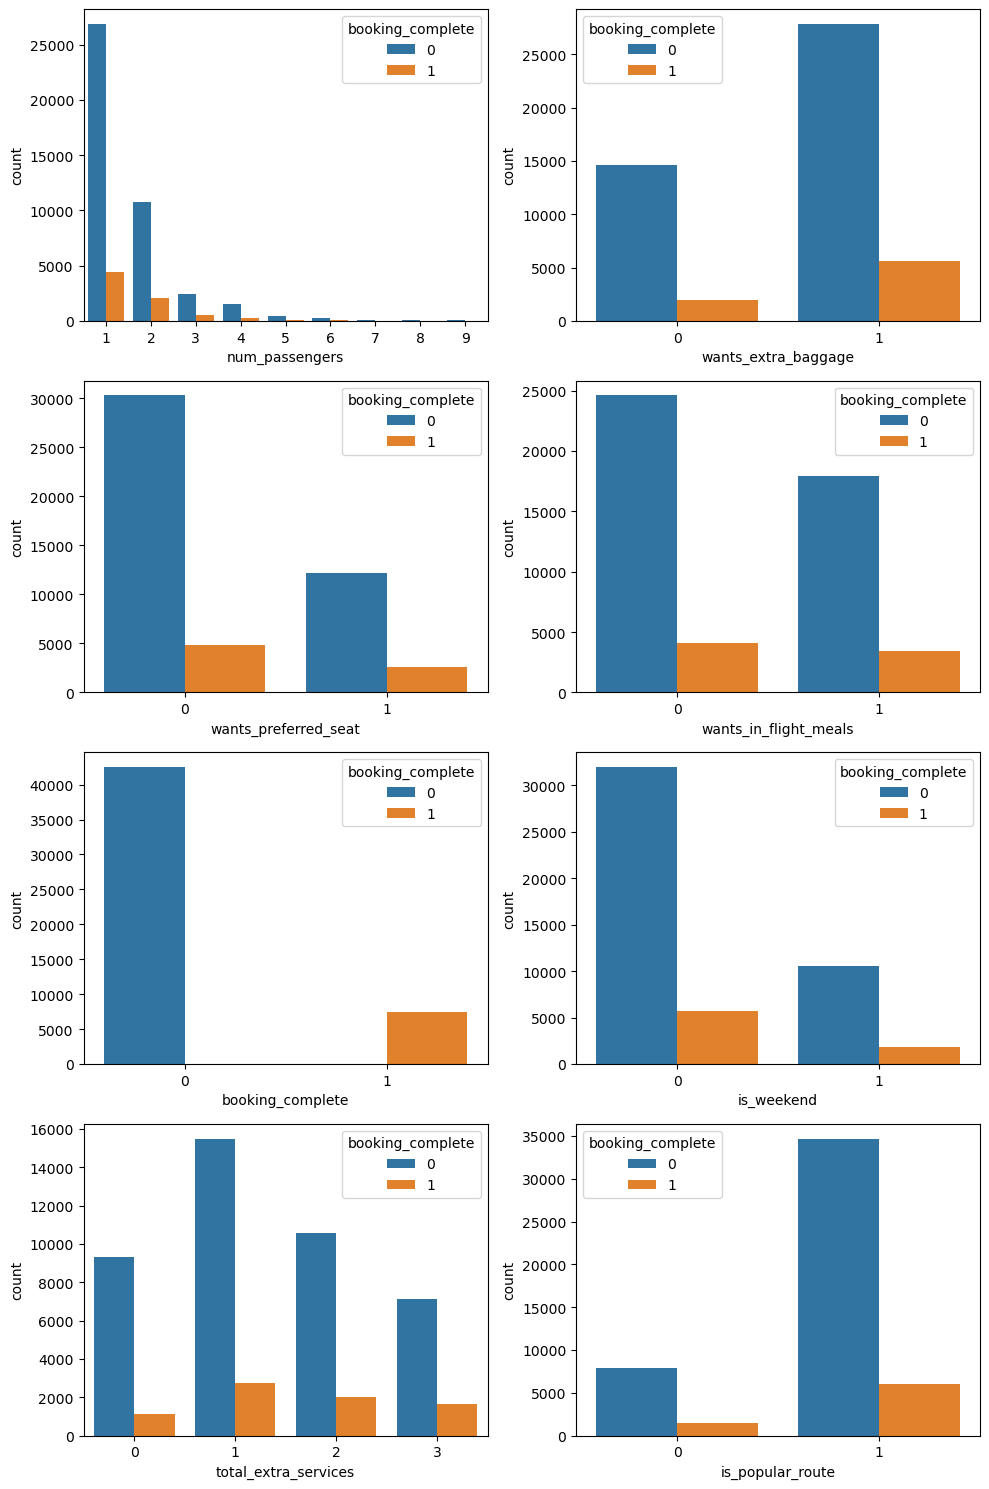

In [30]:
#discrete variable vs target variable
plt.figure(figsize=(10,15))
plotnumber = 1
for i in discrete_cols:
    plt.subplot(4,2,plotnumber)
    sns.countplot(data  = df,x = i, hue = 'booking_complete')
    plotnumber = plotnumber + 1
plt.tight_layout()

# DATA PREPROCESSING

### 1. Handling Null Values

In [31]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
is_weekend               0
booking_time_pattern     0
total_extra_services     0
is_popular_route         0
passenger_group          0
dtype: int64

- No null values

### 2. Handling Outliers

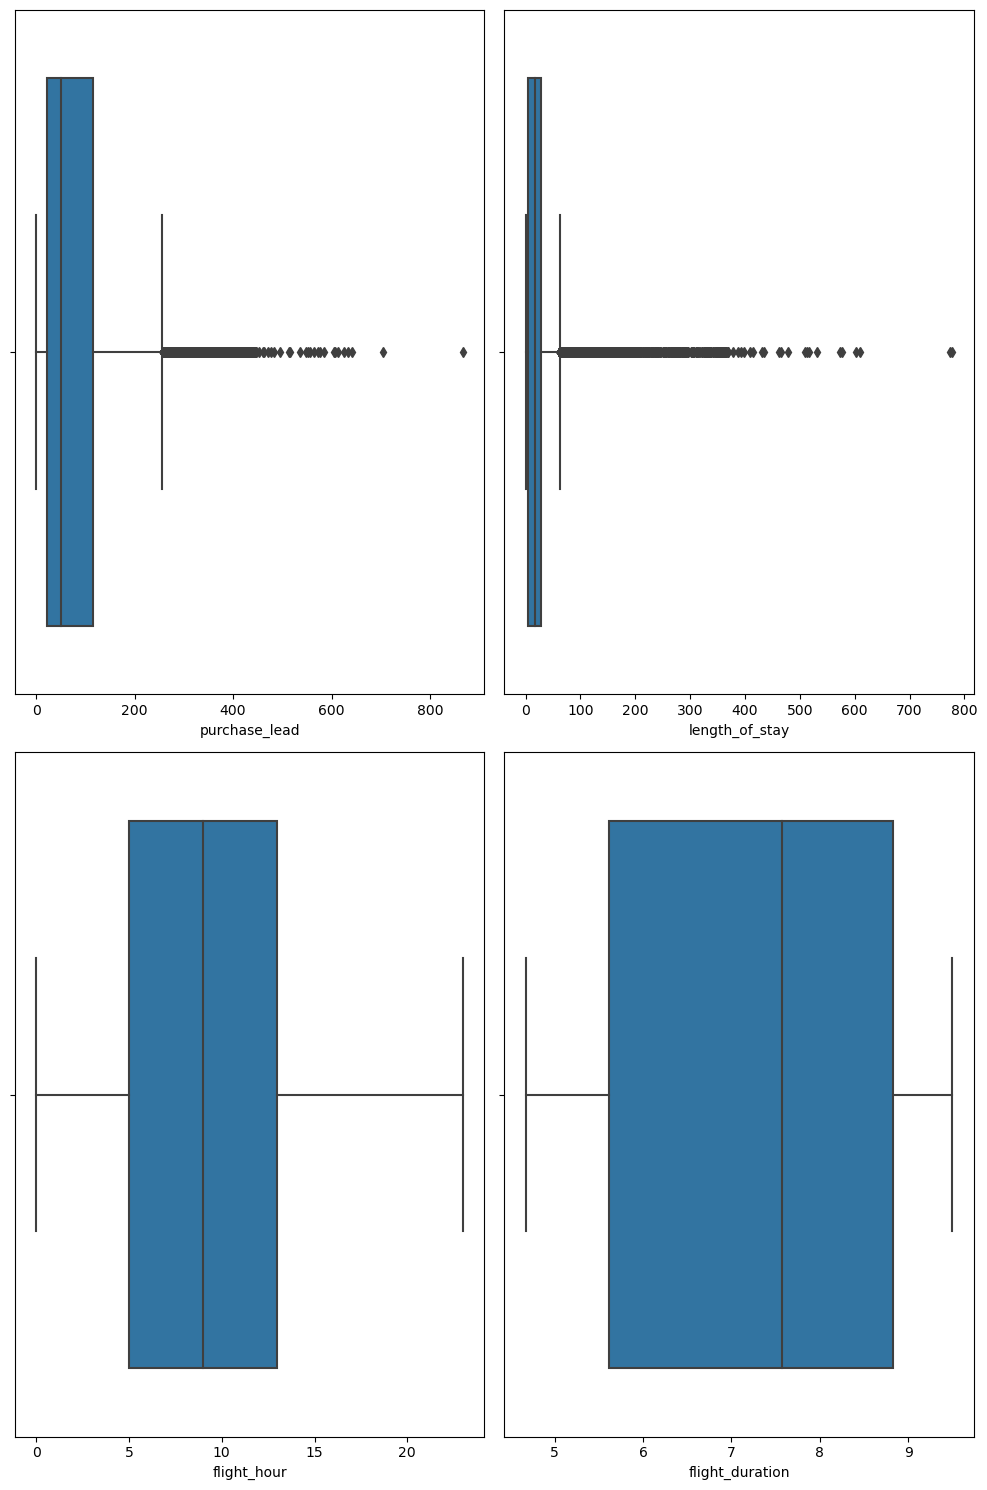

In [32]:
plt.figure(figsize=(10,15), facecolor='white')
index = 1
for i in continous_cols:
    plt.subplot(2,2,index)                             
    sns.boxplot(x = df[i])
    index += 1
plt.tight_layout()
plt.show()

# 3. Converting Categorical Data into Numerical Data

In [33]:
cat_cols

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin',
       'booking_time_pattern', 'passenger_group'],
      dtype='object')

# 1. Sales Channel

In [34]:
df.sales_channel.value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [35]:
df['sales_channel'] = df.sales_channel.replace({'Internet' : 1,'Mobile' : 0})

In [36]:
df.sales_channel.value_counts()

sales_channel
1    44382
0     5618
Name: count, dtype: int64

# 2.Trip_type

In [37]:
df.trip_type.value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [38]:
df['trip_type'] = df.trip_type.replace({'RoundTrip' : 2,'OneWay' : 1,'CircleTrip' : 0})

In [39]:
df.trip_type.value_counts()

trip_type
2    49497
1      387
0      116
Name: count, dtype: int64

# 3.Flight_day

In [40]:
df.flight_day.value_counts()

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

In [41]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [42]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

# 4.Route

In [43]:
df.route.value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [44]:
label_encoder = LabelEncoder()

In [45]:
df['route'] = label_encoder.fit_transform(df['route'])

In [46]:
df.route.value_counts()

route
6      2680
717     924
633     842
436     801
287     744
       ... 
589       1
236       1
259       1
572       1
672       1
Name: count, Length: 799, dtype: int64

# 5.Booking_origin

In [47]:
df.booking_origin.value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [48]:
df['booking_origin'] = label_encoder.fit_transform(df['booking_origin'])

In [49]:
df.booking_origin.value_counts()

booking_origin
4     17872
51     7174
85     4559
43     3885
17     3387
      ...  
67        1
95        1
92        1
13        1
88        1
Name: count, Length: 104, dtype: int64

# 6.Booking_time_pattern

In [50]:
df.booking_time_pattern.value_counts()

booking_time_pattern
Morning      18668
Night        14619
Afternoon    13749
Evening       2964
Name: count, dtype: int64

In [51]:
df['booking_time_pattern'] = df.booking_time_pattern.replace({'Morning' : 3,'Night' : 2,'Afternoon' : 1,'Evening' : 0})

In [52]:
df.booking_time_pattern.value_counts()

booking_time_pattern
3    18668
2    14619
1    13749
0     2964
Name: count, dtype: int64

# 7.Passenger_group

In [53]:
df.passenger_group.value_counts()

passenger_group
Solo      31352
Family    17529
Group      1119
Name: count, dtype: int64

In [54]:
df['passenger_group'] = df.passenger_group.replace({'Solo' : 2,'Family' : 1,'Group' : 0})

In [55]:
df.passenger_group.value_counts()

passenger_group
2    31352
1    17529
0     1119
Name: count, dtype: int64

In [56]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_time_pattern,total_extra_services,is_popular_route,passenger_group
0,2,1,2,262,19,7,6,0,61,1,0,0,5.52,0,1,3,1,0,1
1,1,1,2,112,20,3,6,0,61,0,0,0,5.52,0,1,2,0,0,2
2,2,1,2,243,22,17,3,0,36,1,1,0,5.52,0,0,1,2,0,1
3,1,1,2,96,31,4,6,0,61,0,0,1,5.52,0,1,2,1,0,2
4,2,1,2,68,22,15,3,0,36,1,0,1,5.52,0,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,2,27,6,9,6,720,4,1,0,1,5.62,0,1,3,2,1,1
49996,1,1,2,111,6,4,7,720,4,0,0,0,5.62,0,1,2,0,1,2
49997,1,1,2,24,6,22,6,720,4,0,0,1,5.62,0,1,0,1,1,2
49998,1,1,2,15,6,11,1,720,4,1,0,1,5.62,0,0,3,2,1,2


# FEATURE SELECTION

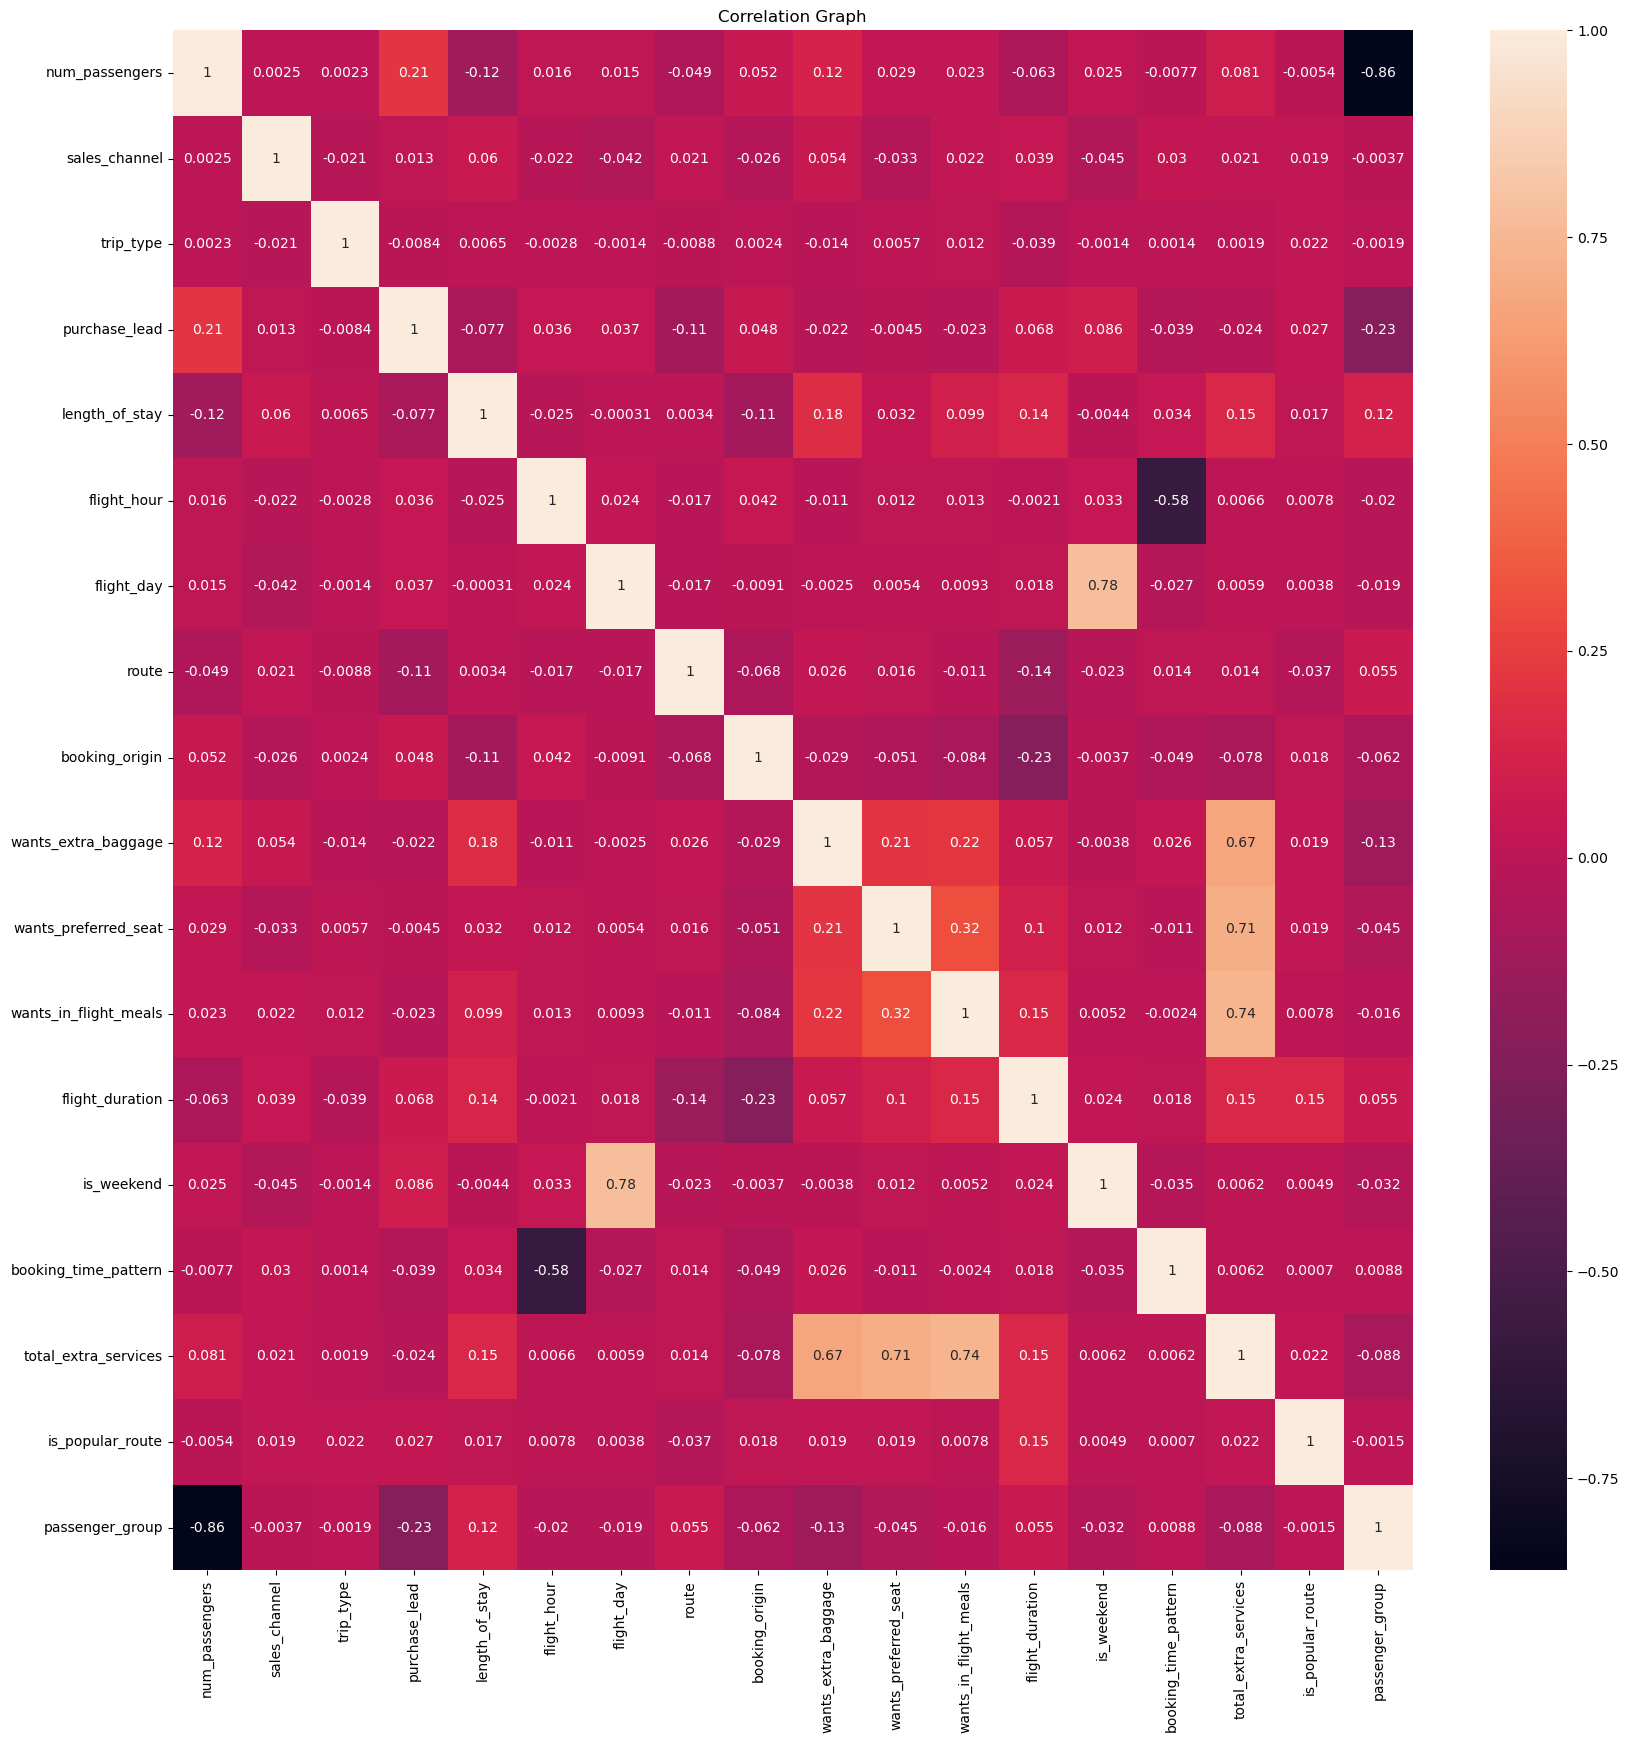

In [57]:
plt.figure(figsize =(20,20))
sns.heatmap(df.drop('booking_complete',axis = 1).corr(), annot = True)
plt.title('Correlation Graph')
plt.show()

# Splitting DAta

In [58]:
x = df.drop('booking_complete', axis = 1)

In [59]:
y = df.booking_complete
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

# 4. Scaling

In [61]:
scaler = StandardScaler() 

In [62]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [63]:
x_train_scaled= pd.DataFrame(data = x_train_scaled, columns = x_train.columns)
x_train_scaled

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,is_weekend,booking_time_pattern,total_extra_services,is_popular_route,passenger_group
0,0.402816,0.358845,0.096005,-0.540314,-0.605585,-0.752497,-0.407960,-0.400231,0.148288,-1.418211,-0.647844,-0.862004,-0.184578,-0.575174,0.023179,-1.386003,0.478397,-1.133720
1,-0.583253,0.358845,0.096005,-0.595705,-0.121539,0.540656,1.095972,0.083529,-1.043102,0.705114,-0.647844,1.160087,0.871032,1.738603,-1.039415,0.608475,0.478397,0.744046
2,1.388884,-2.786715,0.096005,3.625095,-0.061033,0.355920,1.597283,-1.701988,0.698160,0.705114,-0.647844,1.160087,1.038059,1.738603,1.085772,0.608475,0.478397,-1.133720
3,-0.583253,0.358845,0.096005,-0.230124,-0.182045,0.171184,1.095972,-0.932368,-1.043102,0.705114,-0.647844,-0.862004,1.038059,1.738603,1.085772,-0.388764,-2.090315,0.744046
4,-0.583253,0.358845,0.096005,-0.573548,-0.514827,-0.198289,1.597283,-0.413425,0.148288,0.705114,-0.647844,1.160087,0.196243,1.738603,1.085772,0.608475,0.478397,0.744046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,-0.583253,0.358845,0.096005,-0.717565,2.056669,0.355920,0.594661,-0.307877,1.981196,0.705114,-0.647844,1.160087,0.871032,-0.575174,1.085772,0.608475,-2.090315,0.744046
37496,-0.583253,0.358845,0.096005,-0.219046,-0.514827,1.649074,-0.407960,-0.453005,0.484321,0.705114,1.543582,1.160087,0.096027,-0.575174,-2.102008,1.605714,-2.090315,0.744046
37497,0.402816,-2.786715,0.096005,0.246239,-0.545080,-0.567761,-0.909271,-0.114373,1.675711,0.705114,-0.647844,-0.862004,0.196243,-0.575174,1.085772,-0.388764,0.478397,-1.133720
37498,2.374953,0.358845,0.096005,1.631016,-0.121539,-0.198289,-0.909271,-1.701988,0.698160,-1.418211,-0.647844,-0.862004,1.038059,-0.575174,1.085772,-1.386003,0.478397,-1.133720


In [64]:
x_test_scaled= pd.DataFrame(data = x_test_scaled, columns = x_test.columns)
x_test_scaled

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,is_weekend,booking_time_pattern,total_extra_services,is_popular_route,passenger_group
0,0.402816,0.358845,0.096005,-0.418453,-0.575332,1.094865,0.093351,0.686031,0.148288,0.705114,1.543582,-0.862004,-0.184578,-0.575174,-1.039415,0.608475,0.478397,-1.133720
1,-0.583253,-2.786715,0.096005,-0.429532,1.875151,0.910129,-1.410581,-0.448607,1.675711,0.705114,1.543582,-0.862004,1.038059,-0.575174,-1.039415,0.608475,0.478397,0.744046
2,-0.583253,0.358845,0.096005,0.523195,-0.091286,-0.013552,-1.410581,-1.701988,1.309129,0.705114,-0.647844,-0.862004,1.038059,-0.575174,1.085772,-0.388764,0.478397,0.744046
3,-0.583253,0.358845,0.096005,-0.296593,-0.151792,2.572755,-1.410581,-0.013223,0.148288,0.705114,1.543582,1.160087,0.196243,-0.575174,-2.102008,1.605714,-2.090315,0.744046
4,0.402816,0.358845,0.096005,-0.385219,-0.545080,-0.752497,0.093351,0.189077,-0.645972,0.705114,-0.647844,-0.862004,-0.438459,-0.575174,0.023179,-0.388764,0.478397,-1.133720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,-0.583253,0.358845,0.096005,-0.451688,-0.151792,0.725393,1.095972,-0.439812,-1.043102,-1.418211,1.543582,1.160087,-1.106567,1.738603,-1.039415,0.608475,0.478397,0.744046
12496,-0.583253,0.358845,0.096005,0.312709,-0.575332,1.094865,-0.909271,1.556801,1.431323,-1.418211,-0.647844,-0.862004,-0.632211,-0.575174,-1.039415,-1.386003,0.478397,0.744046
12497,0.402816,0.358845,0.096005,0.323787,-0.575332,0.910129,-0.909271,-0.835616,0.148288,0.705114,1.543582,1.160087,0.931162,-0.575174,-1.039415,1.605714,0.478397,-1.133720
12498,-0.583253,0.358845,0.096005,-0.540314,2.026416,-0.383025,-1.410581,-0.954357,-1.043102,0.705114,-0.647844,-0.862004,-1.106567,-0.575174,1.085772,-0.388764,0.478397,0.744046


# 5.Balancing

In [65]:
sm = SMOTE()

In [66]:
x_sm,y_sm = sm.fit_resample(x_train_scaled,y_train)

In [67]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 31874, 1: 5626})
Counter({0: 31874, 1: 31874})


# MODELS

# 1. Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)

In [69]:
rf.fit(x_sm,y_sm)

RandomForestClassifier()

##### Prediction

In [70]:
rf_y_train= rf.predict(x_sm)
rf_y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [71]:
rf_y_pred = rf.predict(x_test_scaled)
rf_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
rf_y_pred_prob = rf.predict_proba(x_test_scaled)[:,1]
rf_y_pred_prob

array([0.21, 0.32, 0.21, ..., 0.25, 0.1 , 0.2 ])

##### Evaluation

In [73]:
rf_acc_train = accuracy_score(y_sm,rf_y_train)
rf_acc_train

0.9999372529334254

In [74]:
rf_acc_test = accuracy_score(y_test,rf_y_pred)
print('ACCURACY SCORE:',rf_acc_test)
rf_pre = precision_score(y_test,rf_y_pred)
print('PRECISION SCORE:',rf_pre)
rf_recall = recall_score(y_test,rf_y_pred)
print('RECALL SCORE:',rf_recall)
rf_f1 = f1_score(y_test,rf_y_pred)
print('F1 SCORE:',rf_f1)
rf_roc = roc_auc_score(y_test,rf_y_pred_prob)
print('ROC AUC SCORE:',rf_roc)

ACCURACY SCORE: 0.83704
PRECISION SCORE: 0.4053224155578301
RECALL SCORE: 0.21382289416846653
F1 SCORE: 0.2799575821845175
ROC AUC SCORE: 0.7516917006894894


# HyperParamter Tuning in RF

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
n_estimators = [50,100,200]
max_features = ['auto']
max_depth = [5,10,None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 

In [77]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [78]:
rscv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid, n_iter=50, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [79]:
rscv.fit(x_sm,y_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\mdsmb\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [81]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [82]:
rf2 = RandomForestClassifier(n_estimators = 100,                
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = None,
 bootstrap = False)

In [83]:
rf2.fit(x_sm,y_sm)

C:\Users\mdsmb\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_features='auto')

In [84]:
rf2_y_pred = rf2.predict(x_test_scaled)
rf2_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
rf2_y_pred_prob = rf2.predict_proba(x_test_scaled)[:,1]
rf2_y_pred_prob

array([0.19, 0.31, 0.24, ..., 0.23, 0.09, 0.15])

In [86]:
rf2_acc_test = accuracy_score(y_test,rf2_y_pred)
print('ACCURACY SCORE:',rf2_acc_test)
rf2_pre = precision_score(y_test,rf2_y_pred)
print('PRECISION SCORE:',rf2_pre)
rf2_recall = recall_score(y_test,rf2_y_pred)
print('RECALL SCORE:',rf2_recall)
rf2_f1 = f1_score(y_test,rf2_y_pred)
print('F1 SCORE:',rf2_f1)
rf2_roc = roc_auc_score(y_test,rf2_y_pred_prob)
print('ROC AUC SCORE:',rf2_roc)
print('------')
print('RANDOM FOREST CLASSIFICATION REPORT:')
print(classification_report(y_test ,rf2_y_pred))

ACCURACY SCORE: 0.84024
PRECISION SCORE: 0.41714285714285715
RECALL SCORE: 0.1970842332613391
F1 SCORE: 0.26769343601026774
ROC AUC SCORE: 0.7464251695326433
------
RANDOM FOREST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10648
           1       0.42      0.20      0.27      1852

    accuracy                           0.84     12500
   macro avg       0.64      0.57      0.59     12500
weighted avg       0.80      0.84      0.82     12500



# 2.XGBoost

In [87]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [88]:
xgb.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##### Prediction

In [89]:
xgb_y_train = xgb.predict(x_sm)
xgb_y_train

array([0, 0, 0, ..., 1, 1, 1])

In [90]:
xgb_y_pred = xgb.predict(x_test_scaled)
xgb_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
xgb_y_pred_proba = xgb.predict_proba(x_test_scaled)[:,1]
xgb_y_pred_proba

array([0.20618393, 0.16109651, 0.20383848, ..., 0.2398844 , 0.03366355,
       0.14734046], dtype=float32)

##### Evaluation

In [92]:
xgb_acc_train  = accuracy_score(y_sm,xgb_y_train)
xgb_acc_train

0.9228838551797703

In [93]:
xgb_acc_test = accuracy_score(y_test,xgb_y_pred)
print('ACCURACY SCORE:',xgb_acc_test)
xgb_pre = precision_score(y_test,xgb_y_pred)
print('PRECISION SCORE:',xgb_pre)
xgb_recall = recall_score(y_test,xgb_y_pred)
print('RECALL SCORE:',xgb_recall)
xgb_f1 = f1_score(y_test,xgb_y_pred)
print('F1 SCORE:',xgb_f1)
xgb_roc = roc_auc_score(y_test,xgb_y_pred_proba)
print('ROC AUC SCORE:',xgb_roc)

ACCURACY SCORE: 0.84424
PRECISION SCORE: 0.42725880551301687
RECALL SCORE: 0.15064794816414687
F1 SCORE: 0.2227544910179641
ROC AUC SCORE: 0.7750661812194017


# HyperParamter Tuning in XGB

In [94]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}     #regularization l1,l2 

In [95]:
XGB = XGBClassifier(random_state=42, verbosity=0, silent=0)

In [96]:
rcv= RandomizedSearchCV(estimator=XGB,param_distributions=param_grid, n_iter=50, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [97]:
rcv.fit(x_sm,y_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  3.2, 6.4, 12.8, 25.6, 51.2,
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=42, verbose=2)

In [98]:
cv_best_params = rcv.best_params_
print(f"Best paramters: {cv_best_params})")

Best paramters: {'reg_lambda': 0.2, 'reg_alpha': 0.8, 'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.2})


In [99]:
XGB2 = XGBClassifier(reg_lambda= 0.2, reg_alpha= 0.8, n_estimators=100, max_depth=11, learning_rate=0.1, gamma=0.2)

In [100]:
XGB2.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
xgb2_y_pred = XGB2.predict(x_test_scaled)

In [102]:
xgb2_y_pred_prob = XGB2.predict_proba(x_test_scaled)[:,1]

In [103]:
xgb2_acc_test = accuracy_score(y_test,xgb2_y_pred)
print('ACCURACY SCORE:',xgb2_acc_test)
xgb2_pre = precision_score(y_test,xgb2_y_pred)
print('PRECISION SCORE:',xgb2_pre)
xgb2_recall = recall_score(y_test,xgb2_y_pred)
print('RECALL SCORE:',xgb2_recall)
xgb2_f1 = f1_score(y_test,xgb2_y_pred)
print('F1 SCORE:',xgb2_f1)
xgb2_roc = roc_auc_score(y_test,xgb2_y_pred_prob)
print('ROC AUC SCORE:',xgb2_roc)
print('------')
print('GRADIENT BOOSTING CLASSIFICATION REPORT:')
print(classification_report(y_test,xgb2_y_pred))

ACCURACY SCORE: 0.84352
PRECISION SCORE: 0.43010752688172044
RECALL SCORE: 0.17278617710583152
F1 SCORE: 0.24653312788906012
ROC AUC SCORE: 0.771960491470224
------
GRADIENT BOOSTING CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     10648
           1       0.43      0.17      0.25      1852

    accuracy                           0.84     12500
   macro avg       0.65      0.57      0.58     12500
weighted avg       0.80      0.84      0.81     12500



# 3.LightGBm

In [104]:
import lightgbm as lgb
gbm = lgb.LGBMClassifier(class_weight = 'balanced')

In [105]:
gbm.fit(x_sm,y_sm)

[LightGBM] [Info] Number of positive: 31874, number of negative: 31874
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3593
[LightGBM] [Info] Number of data points in the train set: 63748, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced')

##### Prediction

In [106]:
lgb_y_train = gbm.predict(x_sm)
lgb_y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [107]:
lgb_y_pred = gbm.predict(x_test_scaled)
lgb_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
lgb_y_pred_prob = gbm.predict_proba(x_test_scaled)[:,1]
lgb_y_pred_prob

array([0.21857044, 0.14613342, 0.48981505, ..., 0.23328776, 0.09008901,
       0.28399187])

##### Evaluation

In [109]:
lgb_acc_train  = accuracy_score(y_sm,lgb_y_train)
lgb_acc_train

0.9085147769341784

In [110]:
lgb_acc_test = accuracy_score(y_test,lgb_y_pred)
print('ACCURACY SCORE:',lgb_acc_test)
lgb_pre = precision_score(y_test,lgb_y_pred)
print('PRECISION SCORE:',lgb_pre)
lgb_recall = recall_score(y_test,lgb_y_pred)
print('RECALL SCORE:',lgb_recall)
lgb_f1 = f1_score(y_test,lgb_y_pred)
print('F1 SCORE:',lgb_f1)
lgb_roc = roc_auc_score(y_test,lgb_y_pred_prob)
print('ROC AUC SCORE:',lgb_roc)

ACCURACY SCORE: 0.84616
PRECISION SCORE: 0.42462845010615713
RECALL SCORE: 0.1079913606911447
F1 SCORE: 0.17219113215669393
ROC AUC SCORE: 0.770582911969597


# HyperParameter Tuning in LIghtgbm

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
from scipy.stats import uniform,randint

In [113]:
param_distributions = { 'num_leaves' : randint(20,150),
                      'learning_rate ': uniform(0.01,0.2),
                      'n_estimators' : randint(50,500),
                      'max_depth' : randint(-1,30),
                      'min_child_samples' : randint(10,100),
                      'subsample' : [0.6,0.8,1.0],
                      'colsample_bytree' : [0.6,0.8,1.0],
                      'reg_alpha' : [0,0.1,0.5,1.0],
                      'reg_lambda' : [0,0.1,0.5,1.0]}

In [114]:
random_search = RandomizedSearchCV(gbm,param_distributions,n_iter = 50,cv = 3,verbose = 1, n_jobs = -1,random_state = 42)

In [115]:
random_search.fit(x_sm,y_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.09503117489824894
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.09503117489824894
[LightGBM] [Info] Number of positive: 31874, number of negative: 31874
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3593
[LightGBM] [Info] Number of data points in the train set: 63748, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(class_weight='balanced'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate ': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000258F4247BD0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000258F5472C90>,
                                        'min_child...ure.rv_discrete_frozen object at 0x00000258F5472290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000258F54714D0>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000258F4245D10>,
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=1)

In [120]:
best_model = random_search.best_estimator_

In [121]:
lgb_y_pred1 = best_model.predict(x_test_scaled)

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.09503117489824894


In [122]:
lgb_y_pred_prob1 = best_model.predict_proba(x_test_scaled)[:,1]

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.09503117489824894


In [123]:
lgb_acc_test1 = accuracy_score(y_test,lgb_y_pred1)
print('ACCURACY SCORE:',lgb_acc_test1)
lgb_pre1 = precision_score(y_test,lgb_y_pred1)
print('PRECISION SCORE:',lgb_pre1)
lgb_recall1 = recall_score(y_test,lgb_y_pred1)
print('RECALL SCORE:',lgb_recall1)
lgb_f11 = f1_score(y_test,lgb_y_pred1)
print('F1 SCORE:',lgb_f11)
lgb_roc1 = roc_auc_score(y_test,lgb_y_pred_prob1)
print('ROC AUC SCORE:',lgb_roc1)
print('-----')
print('LIGHT GBM CLASSIFICATION REPORT:')
print(classification_report(y_test,lgb_y_pred1))

ACCURACY SCORE: 0.84888
PRECISION SCORE: 0.4677137870855148
RECALL SCORE: 0.1447084233261339
F1 SCORE: 0.22103092783505154
ROC AUC SCORE: 0.7844765563007401
-----
LIGHT GBM CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     10648
           1       0.47      0.14      0.22      1852

    accuracy                           0.85     12500
   macro avg       0.67      0.56      0.57     12500
weighted avg       0.81      0.85      0.81     12500



Top Influencing Variables:
                 Feature  Importance
8         booking_origin    0.164370
7                  route    0.035352
12       flight_duration    0.030111
4         length_of_stay    0.015863
15  total_extra_services    0.011152
1          sales_channel    0.010889
0         num_passengers    0.007973
17       passenger_group    0.007094
3          purchase_lead    0.005396
13            is_weekend    0.004108


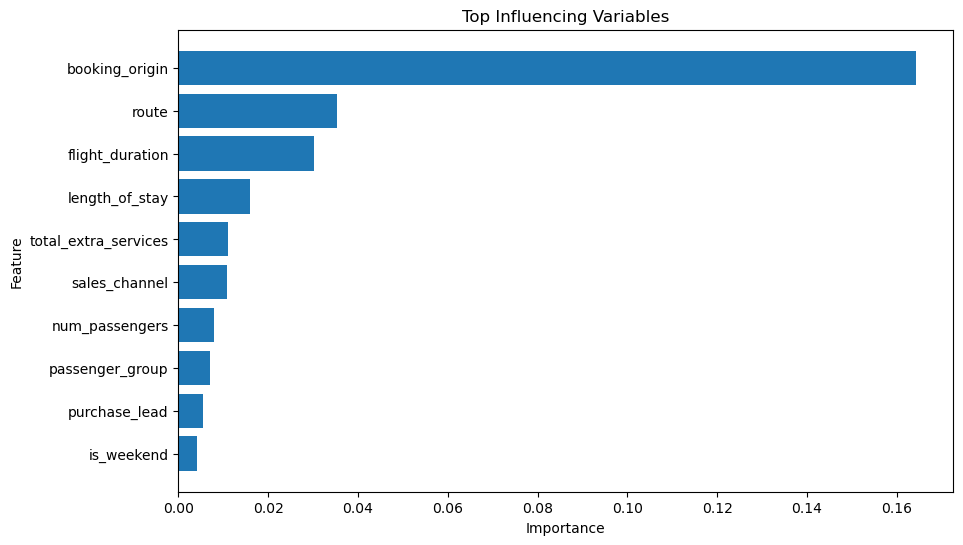

In [143]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(gbm, x_test_scaled, y_test, scoring='roc_auc')

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': x_test_scaled.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top Influencing Variables:")
print(importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
plt.gca().invert_yaxis()
plt.title("Top Influencing Variables")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig('topvariables.png')
plt.show()